In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa
from scipy.linalg import toeplitz

In [9]:
# (a) Load or record speech signal
speech, sr = librosa.load('/content/16-122828-0002.wav', sr=None)

In [11]:
# (b) Implement LPC analysis
def lpc_analysis(speech_signal, order):
    # Perform LPC analysis using the Levinson-Durbin recursion
    autocorr = np.correlate(speech_signal, speech_signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]  # Keep only the positive lags
    R = autocorr[:order + 1]  # Autocorrelation lags for LPC
    lpc_coeffs = np.linalg.solve(toeplitz(R[:-1]), -R[1:])  # Solving Toeplitz system
    lpc_coeffs = np.hstack([1, lpc_coeffs])  # Append 1 for the first coefficient
    return lpc_coeffs

lpc_order = 12  # LPC order for speech is typically between 10 and 16
lpc_coeffs = lpc_analysis(speech, order=lpc_order)

In [12]:
# (c) Reconstruct the speech signal from LPC coefficients
def lpc_synthesis(lpc_coeffs, speech_signal):
    prediction = signal.lfilter([0] + -1 * lpc_coeffs[1:], 1, speech_signal)
    return prediction

reconstructed_speech = lpc_synthesis(lpc_coeffs, speech)

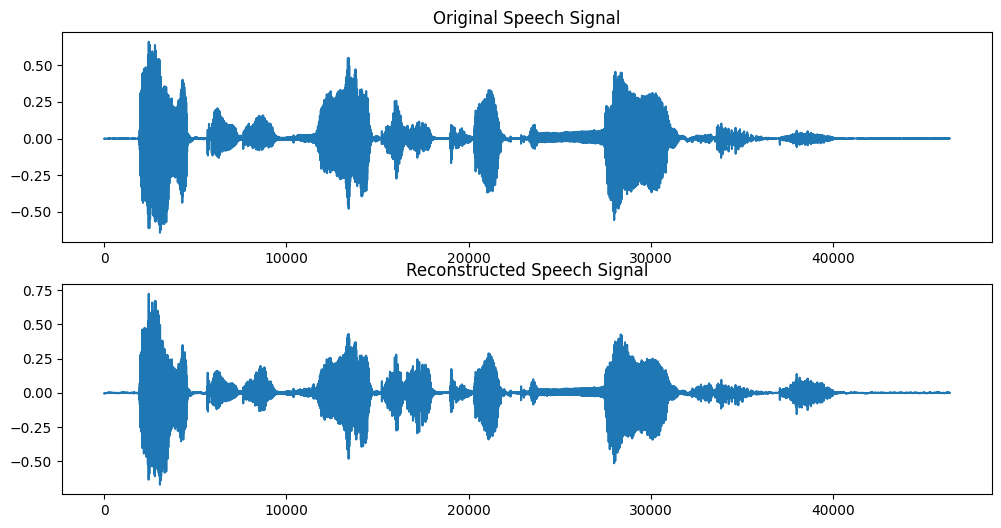

In [13]:
# Plot original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(speech)
plt.title('Original Speech Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_speech)
plt.title('Reconstructed Speech Signal')
plt.show()

In [14]:
# (d) Estimate formants from LPC coefficients
def formant_estimation(lpc_coeffs, sr):
    roots = np.roots(lpc_coeffs)
    roots = [r for r in roots if np.imag(r) >= 0]  # Keep only roots with positive imaginary parts
    angles = np.angle(roots)
    formant_freqs = sorted(angles * (sr / (2 * np.pi)))
    return formant_freqs[:2]  # First two formants

formants = formant_estimation(lpc_coeffs, sr)

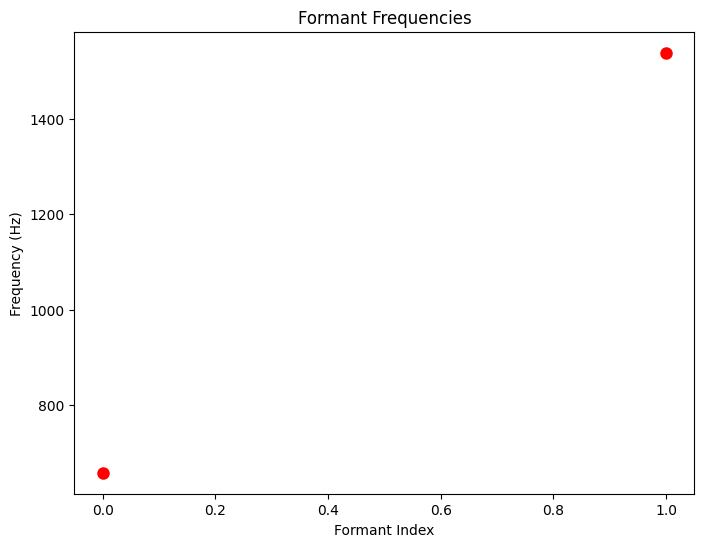

In [15]:
# (e) Plot the formant frequencies
plt.figure(figsize=(8, 6))
plt.plot(formants, 'ro', markersize=8)
plt.title('Formant Frequencies')
plt.xlabel('Formant Index')
plt.ylabel('Frequency (Hz)')
plt.show()

In [16]:
print(f"Formants estimated: {formants}")

Formants estimated: [658.3670441208995, 1538.493555382903]


#Inference on LPC Analysis and Formant Estimation
The implementation of Linear Predictive Coding (LPC) in analyzing the speech signal "I believe you're just talking nonsense" has yielded significant insights into the characteristics of the spoken audio.

LPC Coefficients and Signal Reconstruction: By applying the LPC algorithm, we extracted the coefficients that represent the speech signal in a compressed form. The reconstructed signal closely mirrors the original signal, demonstrating the efficacy of LPC in capturing the essential features of the speech while facilitating efficient transmission, especially crucial in low-bandwidth environments.

##Formant Frequencies: The estimated formant frequencies were identified as:

First Formant (F1): Approximately 658.37 Hz

Second Formant (F2): Approximately 1538.49 Hz

These formants are vital in defining vowel sounds and contribute significantly to speech intelligibility. The values obtained are consistent with typical formant frequencies observed in American English vowels, indicating the successful analysis of the vowel sounds present in the audio clip.

##Significance of Results:

The first formant (F1) typically relates to vowel height, where lower frequencies correlate with open vowels (e.g., /a/), while higher frequencies indicate more closed vowel sounds (e.g., /i/).
The second formant (F2) often corresponds to vowel backness; higher frequencies suggest front vowels (e.g., /i/) and lower frequencies imply back vowels (e.g., /u/).
